# NAME: SARAN ADHIKARI

# UNIVERSITY ID: 2329794

# WORKSHEET04

# IMPORTING LIBRARIES

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
!unzip "/content/Copy of devnagari digit.zip" -d /content/extracted_data/

train_dir = "/content/extracted_data/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/extracted_data/DevanagariHandwrittenDigitDataset/Test"


Streaming output truncated to the last 5000 lines.
  inflating: /content/extracted_data/DevanagariHandwrittenDigitDataset/Train/digit_7/10299.png  
  inflating: /content/extracted_data/DevanagariHandwrittenDigitDataset/Train/digit_7/10300.png  
  inflating: /content/extracted_data/DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: /content/extracted_data/DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: /content/extracted_data/DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: /content/extracted_data/DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: /content/extracted_data/DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: /content/extracted_data/DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: /content/extracted_data/DevanagariHandwrittenDigitDataset/Train/digit_7/104017.png  
  inflating: /content/extracted_data/DevanagariHandwrittenDigitDataset/Trai

In [3]:

img_height, img_width = 28, 28
num_classes = 10
batch_size = 128
epochs = 30
validation_split = 0.2

# DATA PREPROCESSING

In [4]:
def load_images_from_folder(folder):
    images = []
    labels = []
    class_labels = sorted(os.listdir(folder))

    for label, class_name in enumerate(class_labels):
        class_folder = os.path.join(folder, class_name)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            img = Image.open(img_path).convert('L').resize((img_height, img_width))
            img_array = np.array(img) / 255.0  # Normalize pixels
            images.append(img_array)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load training and testing data
X_train, y_train = load_images_from_folder(train_dir)
X_test, y_test = load_images_from_folder(test_dir)

In [5]:
# Reshaping data for model input
X_train = X_train.reshape(-1, img_height, img_width, 1)
X_test = X_test.reshape(-1, img_height, img_width, 1)

# One-hot encoding labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Splitting train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_split, random_state=42)

# CREATING A MODEL

In [6]:
model = Sequential([
    Flatten(input_shape=(img_height, img_width, 1)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Compile model with Adam optimizer
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# TRAIN MODEL

In [8]:
# Callbacks for better training
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)
]

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=callbacks)

Epoch 1/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.7089 - loss: 0.9529 - val_accuracy: 0.9582 - val_loss: 0.2799 - learning_rate: 0.0010
Epoch 2/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9496 - loss: 0.1617 - val_accuracy: 0.9738 - val_loss: 0.1106 - learning_rate: 0.0010
Epoch 3/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9717 - loss: 0.0996 - val_accuracy: 0.9788 - val_loss: 0.0670 - learning_rate: 0.0010
Epoch 4/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9779 - loss: 0.0687 - val_accuracy: 0.9841 - val_loss: 0.0577 - learning_rate: 0.0010
Epoch 5/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9823 - loss: 0.0575 - val_accuracy: 0.9853 - val_loss: 0.0535 - learning_rate: 0.0010
Epoch 6/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9879 - loss: 0.0420 - val_accuracy: 0.9844 - val_loss: 0.0524 - learning_rate: 0.0010
Epoch 7/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9866 - loss: 0

In [9]:
# Evaluate model performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9920 - loss: 0.0356
Test Accuracy: 99.10%


# VISUALIZATION GRPAH

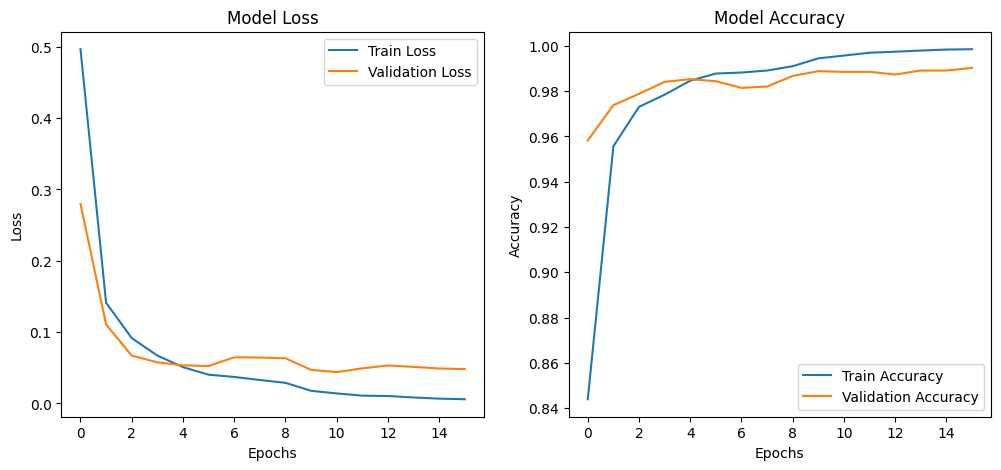

In [12]:
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')


plt.show()

# CONFUSION MATRIX

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


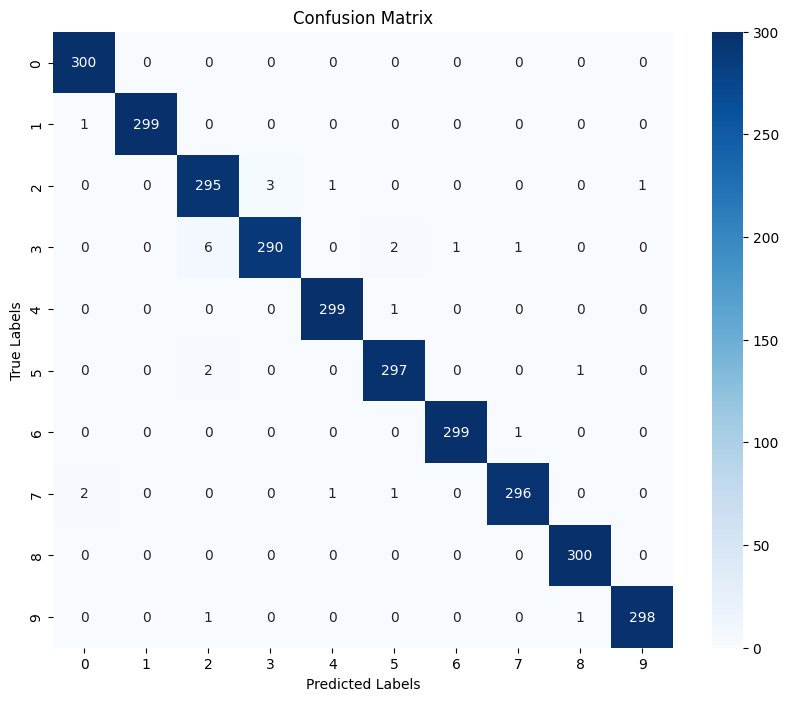

In [13]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()